# Importing Data

In [21]:
import pandas as pd

df = pd.read_csv('./data/AnnualTicketSales.csv')

df.head()
df.drop(df.columns[-1], axis=1, inplace=True)
df.drop('TOTAL INFLATION ADJUSTED BOX OFFICE', axis=1, inplace=True)

In [22]:
df.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460",$8.97


In [23]:
def preprocess(raw):
    raw = str(raw)
    raw = raw.replace(',', '')
    raw = raw.replace('$', '')
    
    return int(float(raw))

for col in df.columns:
    df[col] = df[col].apply(preprocess)

In [24]:
df.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,9
1,2020,223638958,2048534616,9
2,2019,1228541629,11253443955,9
3,2018,1311536128,11948096650,9
4,2017,1225639761,10993991460,8


In [25]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   YEAR                  27 non-null     int64
 1   TICKETS SOLD          27 non-null     int64
 2   TOTAL BOX OFFICE      27 non-null     int64
 3   AVERAGE TICKET PRICE  27 non-null     int64
dtypes: int64(4)
memory usage: 992.0 bytes


# Pie Plot

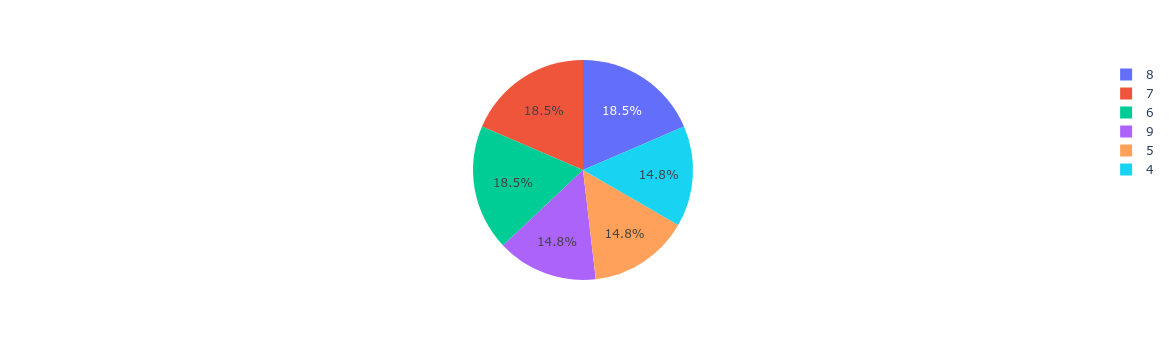

In [27]:
import plotly.express as px

px.pie(df, names='AVERAGE TICKET PRICE')

# Histogram

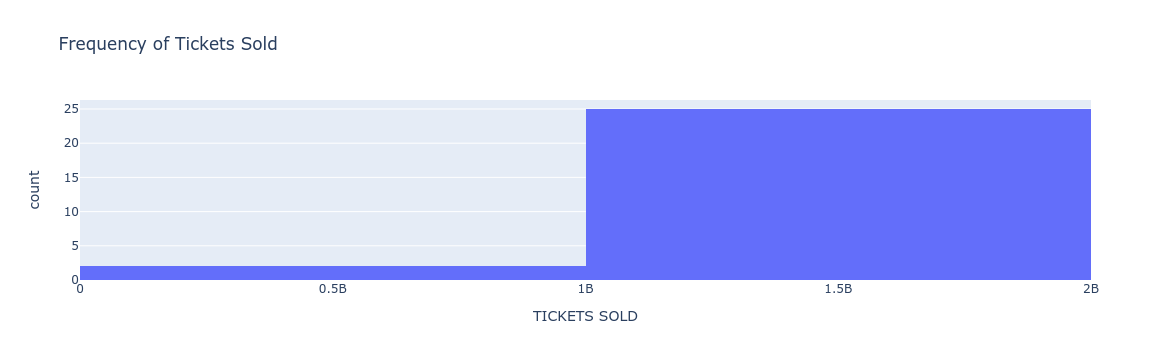

In [30]:
px.histogram(df, x='TICKETS SOLD', nbins=2, title='Frequency of Tickets Sold')

# Box Plot

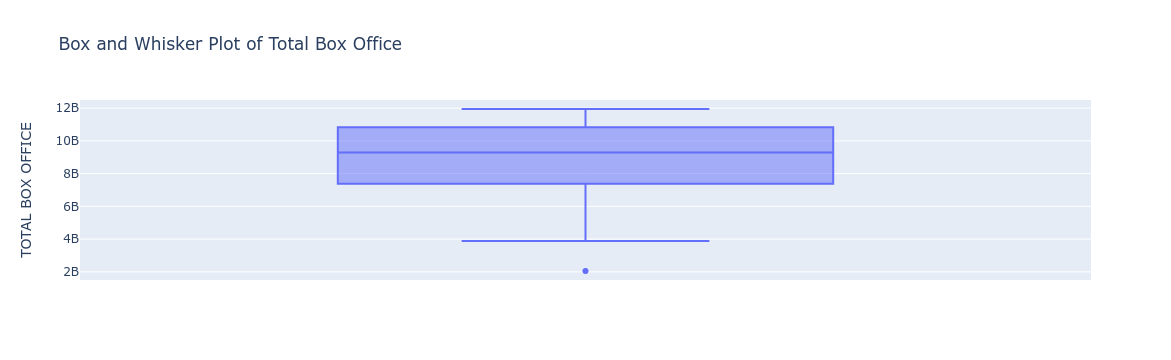

In [40]:
px.box(df,
      y='TOTAL BOX OFFICE',
      title='Box and Whisker Plot of Total Box Office',
      hover_data=['YEAR'],
      )

# Scatter Plot

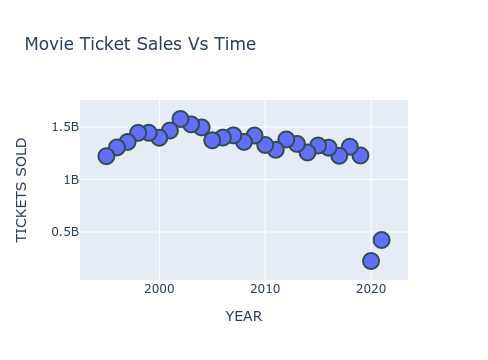

In [43]:
fig = px.scatter(df, x='YEAR',
                y='TICKETS SOLD',
                title='Movie Ticket Sales Vs Time')
fig.update_traces(marker=dict(size=16,
                             line=dict(width=2,
                                      color='DarkSlateGrey')),
                 selector=dict(mode='markers'))

fig.show()

# Bar Plot

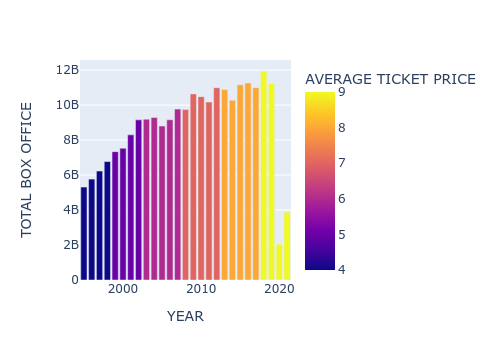

In [44]:
px.bar(df, x='YEAR', y='TOTAL BOX OFFICE', color='AVERAGE TICKET PRICE')

# Customizing P

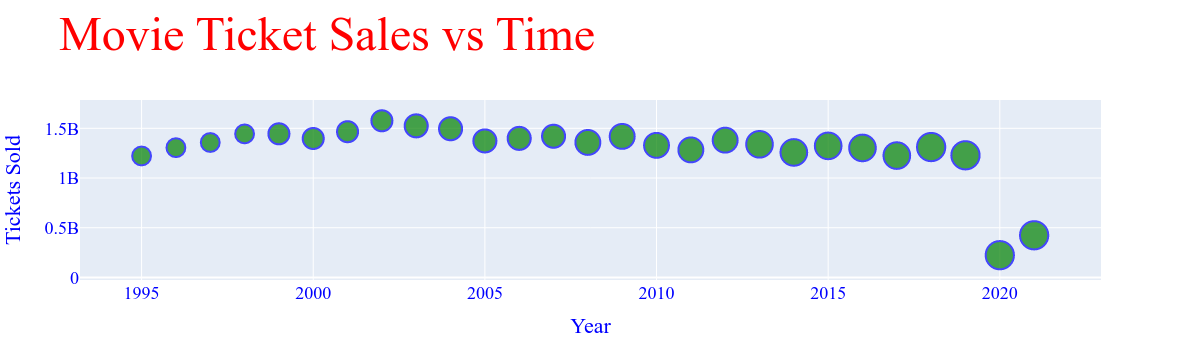

In [51]:
fig = px.scatter(df, x='YEAR', 
           y='TICKETS SOLD',
           size='AVERAGE TICKET PRICE',
           title='Movie Ticket Sales vs Time',
           labels={'TICKETS SOLD':'Tickets Sold',
                   'YEAR':'Year'}
           )

fig.update_traces(marker=dict(
            color='Green',
            line=dict(
                color='Blue',
                width=2
            )
        ),)

fig.update_layout(
    font_family="Calibri",
    font_color="blue",
    font_size=18,
    title_font_family="Bangers",
    title_font_size=48,
    title_font_color="Red",
)

fig.show()

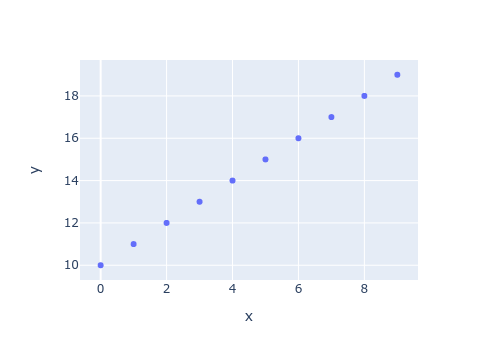

In [47]:
import numpy as np

x, y = np.arange(10), np.arange(10, 20)

px.scatter(x=x, y=y)

# Advanced Plots

- when we want plot multiple plots we can use plotly.graph_objects

- Subplots can be created in this way, otherwise plotly.express is used

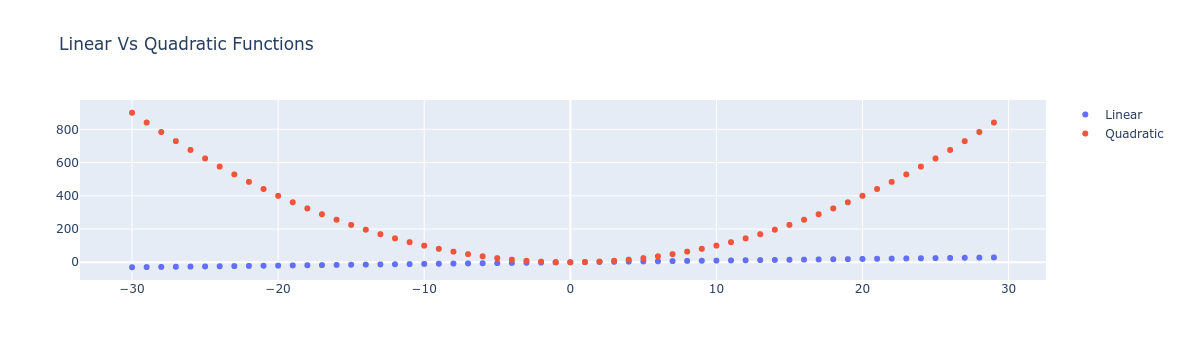

In [52]:
import plotly.graph_objects as go

fig = go.Figure()

x = np.arange(-30, 30)

fig.add_trace(go.Scatter(x=x, y=x**1, mode='markers', name='Linear')) # remove mode='markers' to get a line
fig.add_trace(go.Scatter(x=x, y=x**2, mode='markers', name='Quadratic'))
fig.update_layout(title='Linear Vs Quadratic Functions')
fig.show()

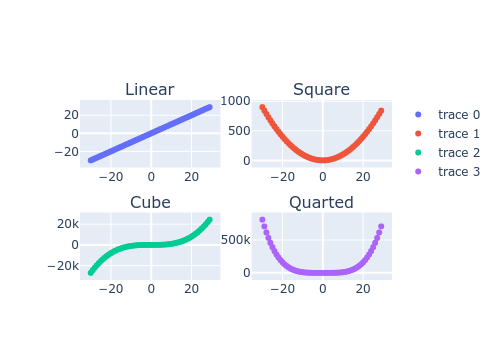

In [55]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2,
                   subplot_titles=('Linear', 'Square', 'Cube', 'Quarted'))

x = np.arange(-30, 30)

fig.add_trace(go.Scatter(x=x, y=x**1, mode='markers'),
             row=1, col=1)
fig.add_trace(go.Scatter(x=x, y=x**2, mode='markers'),
             row=1, col=2)
fig.add_trace(go.Scatter(x=x, y=x**3, mode='markers'),
             row=2, col=1)
fig.add_trace(go.Scatter(x=x, y=x**4, mode='markers'),
             row=2, col=2)
fig.show()